# Scikit-learn Intro

# A. Data Representation in Scikit-learn:

* Each ROW of the data refers to individual set of the dataset, and each COLUMNS represent quantities related to each of these elements.

### A.1. The Features Matrix:

*  Feature Matrix:
    * two-dimensional numerical array or matrix
    * often stored in a variable named `X`.
    * assumed to be 2-D , w/ shape `[n_samples, n_features]` and is most often contained in np array or a pd dataframe, though some sklearn models accept scipy sparse matrices.

* The samples (rows) always refer to the individual objects described by the dataset. The features (columns) always refer to the distinct observations that describe each sample in quantitative manner.

### A.2. The Target (label) Array:

* By convention, usually called `y`
* Usually 1-D, w/ length `n_samples` , or multi.
* Generally contained in a np array or pd series.
* The quantity we want to predict from the features: it is the DEPENDENT Variable.

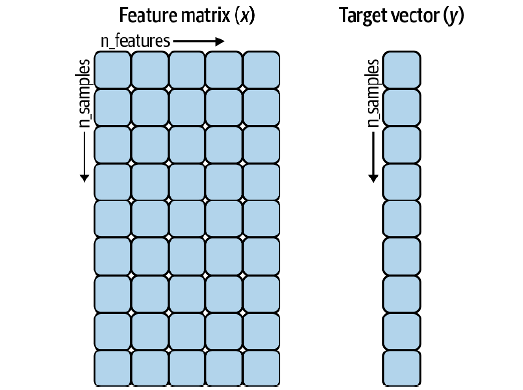

# B. Estimator API

* The scikit-learn API is designed w/ the following guiding principles:
    * Consistency:
        * All objects share a common interface drawn from a limited set of methods, with consistent documentation.
    * Inspection:
        * All specified parameter values are exposed as public attributes.
    * Limited Object Hierarchy:
        * Only algorithms are represented by Python classes; datasets are represented in standard formats (NumPy arrays, Pandas DataFrame objects, SciPy sparse matrices) and parameter names use standard Python strings.
    * Composition:
        * Many machine learning tasks can be expressed as sequences of more fundamental algorithms, and Scikit-Learn makes use of this wherever possible.
    * Sensible Defaults:
        * When models require user-specified parameters, the library defines an appropriate default value.

* Every ML algorithm in sklearn is implemented via the `Estimator API` , w/c provides a consistent interface for a wide range of ml applications.

### B.1. Basics of the API:

* Most commonly, the steps in using the Scikit-Learn Estimator API are as follows:
    1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
    2. Choose model hyperparameters by instantiating this class with desired values.
        * Hyperparameters are parameters that must be set BEFORE the model is fit to the data.
        * In sklearn, hypeparameters are chosen by passing values at model INSTANTIATION.
        * Depending on the model class we are working w/, we might need to answer one or more questions like the ff:
            * Would we like to fit for the offset (i.e., y-intercept)?
            * Would we like the model to be normalized?
            * Would we like to preprocess our features to add model flexibility?
            * What degree of regularization would we like to use in our model?
            * How many model components would we like to use?
            
    3. Arrange data into a features matrix and target vector.
    4. Fit the model to your data by calling the `fit` method of the model instance.
    5. Apply the model to new data:
        * For supervised learning, often we predict labels for unknown data using the `predict` method.
        * For unsupervised learning, we often transform or infer properties of the data using the `transform` or `predict` method.


### B.2. Supervised Learning Example: Simple Linear Regression

In [23]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


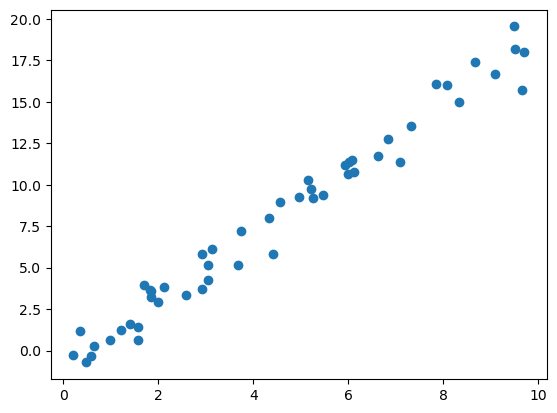

In [25]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

plt.scatter(x, y);

In [26]:
# Choose a class of model
from sklearn.linear_model import LinearRegression

# Choose model hyperparameters
model = LinearRegression(fit_intercept=True)

# Arrange data into a features matrix and target vector
X = x[:, np.newaxis]
X.shape

(50, 1)

In [27]:
# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [28]:
## Slope
model.coef_

array([1.9776566])

In [29]:
## Intercept
model.intercept_

-0.9033107255311164

In [30]:
# Predict labels for unknown data
xfit = np.linspace(-1, 11)

Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

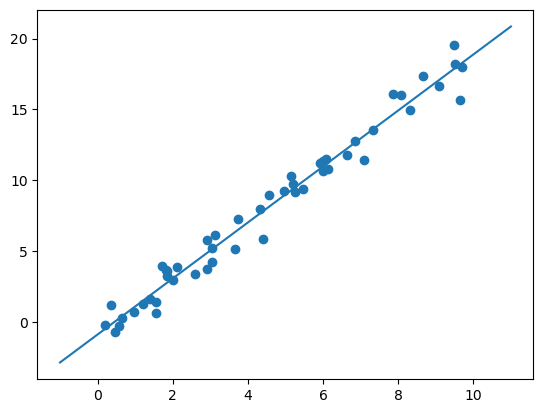

In [31]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

### B.3. Supervised Learning Example: Iris Classification

* Given a model trained on a portion of the Iris data, how well can we predict the remaining labels?
    * For this task, we will use a simple generative model known as Gaussian naive Bayes, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution.
    * Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

In [32]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

In [34]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state=1)

In [35]:
# Import Model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_model = model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.9736842105263158

### B.4. Unsupervised Learning Example: Iris Dimensionality



In [37]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

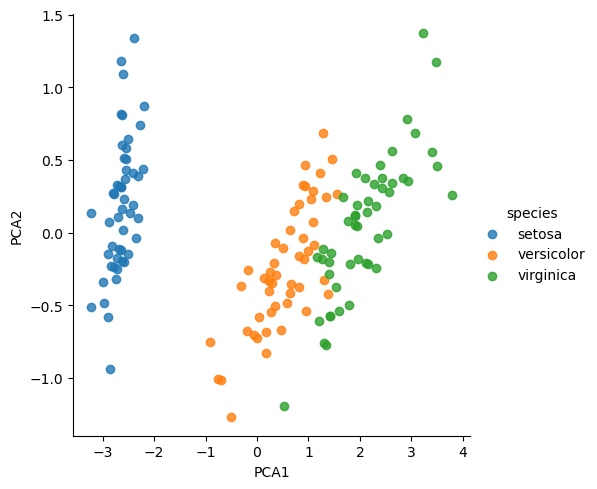

In [38]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False);

### B.5. Unsupervised Learning Example: Iris Clustering

In [39]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

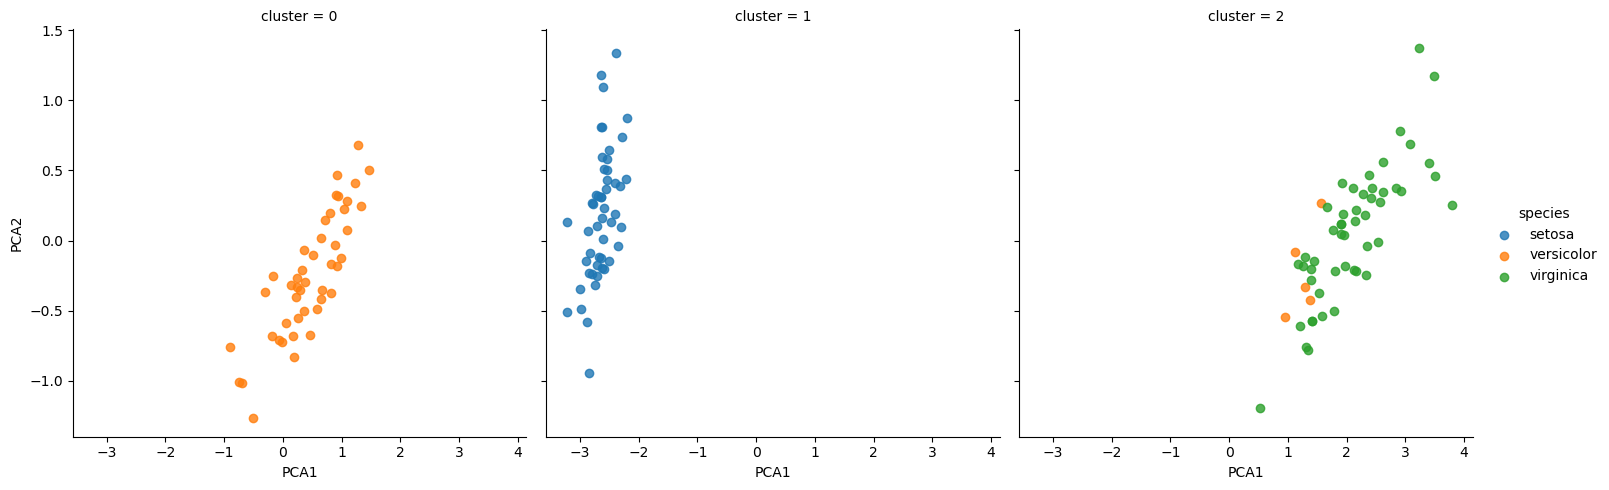

In [40]:
iris['cluster'] = y_gmm

sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

# C. Application: Exploring Handwritten Digits

In [41]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape

(1797, 8, 8)

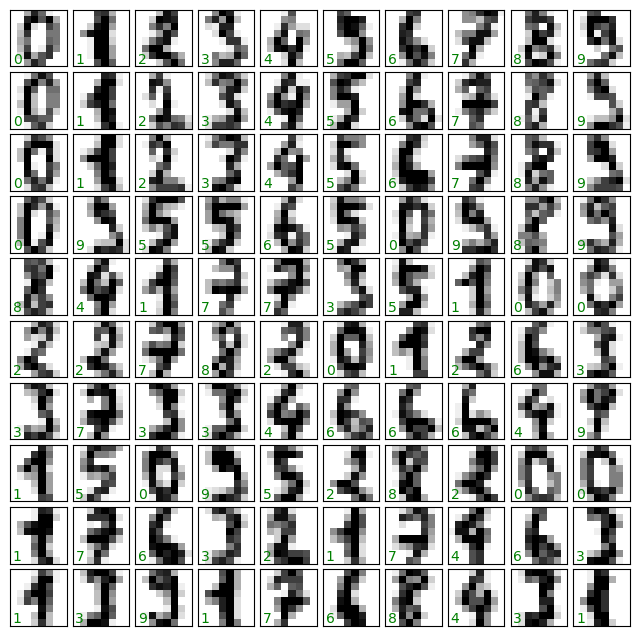

In [42]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8), 
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1)
                        )

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [43]:
X = digits.data
X.shape



(1797, 64)

In [44]:
y = digits.target
y.shape

(1797,)

In [46]:
# Dimensionality Reduction
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(X)
data_projected = iso.transform(X)
data_projected.shape

c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\sklearn\manifold\_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

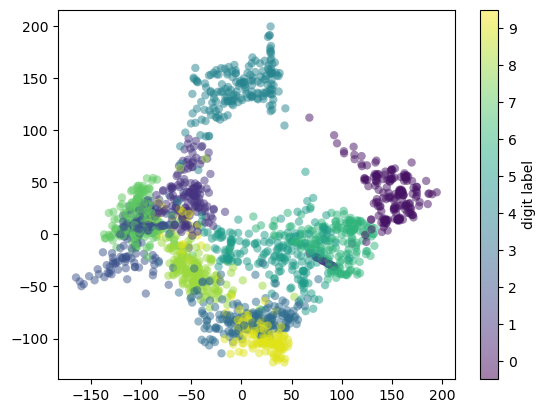

In [48]:
import matplotlib as mpl
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=mpl.colormaps.get_cmap('viridis'))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [50]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred)

0.8333333333333334

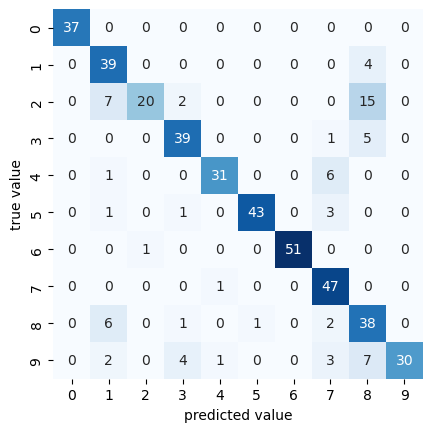

In [55]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)

sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value');

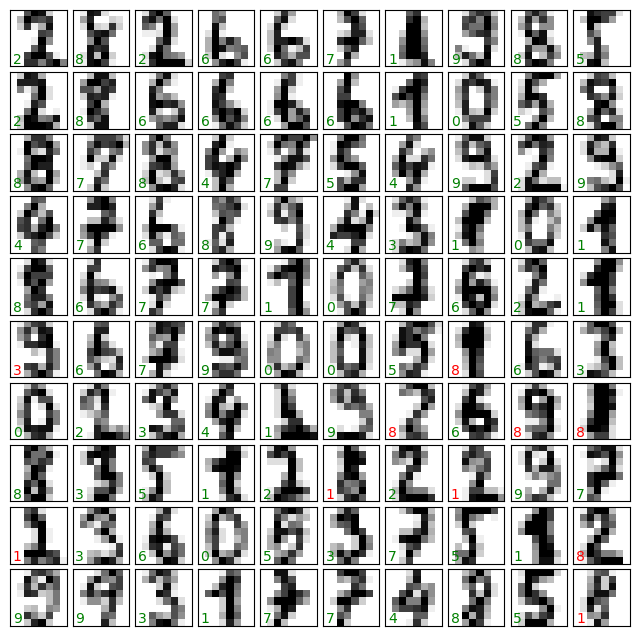

In [57]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
test_images = X_test.reshape(-1, 8, 8)
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_pred[i]),
        transform=ax.transAxes,
        color='green' if (y_test[i] == y_pred[i]) else 'red')